# Factores cuantitativos

In [ ]:
pip install openpyxl

SyntaxError: invalid syntax (828905693.py, line 1)

In [9]:
pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/1c/6f/db0cf5efa48277ac6218d9b981c8fd5e63c4c43e0d9d65015fdc38eed0ef/statsmodels-0.14.5-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/87/2b/b50d3d08ea0fc419c183a84210571eba005328efa62b6b98bc28e9ead32a/patsy-1.0.1-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 12.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 19.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [11]:
data=pd.read_excel("/Users/paofigueroa/Documents/sem 5/Lab de aprendizaje estadístico/bebidas El Feo.xlsx")
data.head()

,K,C,H,M,tam,hielo,Cal
0,1,0,0,0,0,1,9.0
1,1,0,0,0,0,0,7.0
2,1,0,0,0,1,1,10.0
3,1,0,0,0,1,0,8.0
4,0,1,0,0,0,1,8.0


In [12]:
x1=data.K.values.reshape([-1,1])
x2=data.C.values.reshape([-1,1])
x3=data.H.values.reshape([-1,1])
x4=data.M.values.reshape([-1,1])
x5=data.tam.values.reshape([-1,1])
x6=data.hielo.values.reshape([-1,1])
y=data.Cal

In [15]:
n=len(y)
unos=np.ones([n,1])
X=np.hstack([unos, x1,x2,x3, x4,x5,x6])
# X es la concatenación de todos los factores
ols= sm.OLS(y,X)
results= ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cal   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     83.67
Date:                Mon, 08 Sep 2025   Prob (F-statistic):           7.90e-08
Time:                        16:48:29   Log-Likelihood:                 2.8474
No. Observations:                  16   AIC:                             6.305
Df Residuals:                      10   BIC:                             10.94
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1250      0.089     57.752      0.000       4.927       5.323
x1             1.6875      0.113     14.917      0.000       1.435       1.940
x2             0.9375      0.113      8.287      0.000       0.685       1.190
x3             0.8125      0.113      7.182      0.000       0.560       1.065
x4             1.6875      0.113     14.917      0.000       1.435       1.940
x5             1.1875      0.128      9.271      0.000       0.902       1.473
x6             2.1875      0.128     17.078      0.000       1.902       2.473
==============================================================================
Omnibus:                        7.670   Durbin-Watson:                   2.667
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                4.426
Skew:                           1.124   Prob(JB):                        0.109
Kurtosis:                       4.259   Cond. No.                     1.07e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.55e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
data2=pd.read_excel("/Users/paofigueroa/Documents/sem 5/Lab de aprendizaje estadístico/data2_bebidasFeo.xlsx")
data2.head()

,K,C,H,M,tam,hielo,Cal
0,1,0,0,0,-1,1,9.0
1,1,0,0,0,-1,-1,7.0
2,1,0,0,0,1,1,10.0
3,1,0,0,0,1,-1,8.0
4,0,1,0,0,-1,1,8.0


In [27]:
cols=data2.columns
cols=cols.drop("Cal")
x_list = []

for col in cols:
    x_list.append(data2[col].values.reshape(-1, 1))


X = np.hstack(x_list)
y = data2["Cal"].values.reshape(-1, 1)



x=np.ones((len(data2),1))
X_e=np.hstack((x,X))

ols=sm.OLS(y,X_e)
results=ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     83.67
Date:                Mon, 08 Sep 2025   Prob (F-statistic):           7.90e-08
Time:                        17:00:34   Log-Likelihood:                 2.8474
No. Observations:                  16   AIC:                             6.305
Df Residuals:                      10   BIC:                             10.94
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4750      0.051    126.379      0.000       6.361       6.589
x1             2.0250      0.112     18.135      0.000       1.776       2.274
x2             1.2750      0.112     11.418      0.000       1.026       1.524
x3             1.1500      0.112     10.299      0.000       0.901       1.399
x4             2.0250      0.112     18.135      0.000       1.776       2.274
x5             0.5938      0.064      9.271      0.000       0.451       0.736
x6             1.0937      0.064     17.078      0.000       0.951       1.236
==============================================================================
Omnibus:                        7.670   Durbin-Watson:                   2.667
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                4.426
Skew:                           1.124   Prob(JB):                        0.109
Kurtosis:                       4.259   Cond. No.                     9.38e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.27e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Motor test Dataset

In [38]:
dm=pd.read_excel("/Users/paofigueroa/Documents/sem 5/Lab de aprendizaje estadístico/Motor Trend Car Road Tests.xlsx")
dm

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [30]:
dm.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


array([[<Axes: title={'center': 'mpg'}>, <Axes: title={'center': 'cyl'}>,
        <Axes: title={'center': 'disp'}>],
       [<Axes: title={'center': 'hp'}>, <Axes: title={'center': 'drat'}>,
        <Axes: title={'center': 'wt'}>],
       [<Axes: title={'center': 'qsec'}>, <Axes: title={'center': 'vs'}>,
        <Axes: title={'center': 'am'}>],
       [<Axes: title={'center': 'gear'}>,
        <Axes: title={'center': 'carb'}>, <Axes: >]], dtype=object)

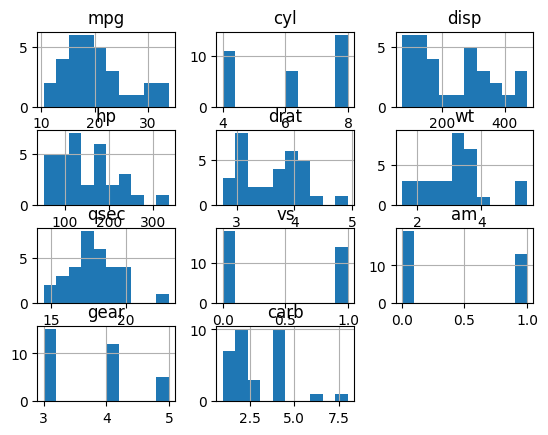

In [ ]:
dm.hist()

Tipo de variables; 
Modelo es cualitativa;
mpg es float;
cyl  es int;
disp es float >0;
hp es int;
drat es  float;
wt es float;
qsec es float;
vs es bool;
am es bool;
gear es int;
carb es int;


In [37]:
dm.isnull().sum()
dm.dropna()
dm.drop_duplicates()
dm

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [53]:
pip install sklearn 

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SK

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LinearRegression

In [58]:
cols=dm.columns
cols=cols.drop("mpg")
cols= cols.drop("model")
x_list = []

for col in cols:
    x_list.append(dm[col].values.reshape(-1, 1))

X = np.hstack(x_list)
y = dm["mpg"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=137, train_size=0.4)

In [59]:
scaler=StandardScaler().fit(X_train)
Xescaled=scaler.transform(X_train)

x=np.ones((len(Xescaled),1))
X_e=np.hstack((x,Xescaled))

ols=sm.OLS(y_train,X_e)
results=ols.fit()
results.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     20.42
Date:                Mon, 08 Sep 2025   Prob (F-statistic):              0.171
Time:                        17:52:17   Log-Likelihood:                -4.3361
No. Observations:                  12   AIC:                             30.67
Df Residuals:                       1   BIC:                             36.01
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.2917      0.347     55.549      0.011      14.879      23.704
x1            -5.7459      2.768     -2.075      0.286     -40.923      29.431
x2            -3.6046      4.494     -0.802      0.570     -60.710      53.501
x3             2.1482      1.533      1.401      0.395     -17.330      21.626
x4            -2.8334      1.264     -2.242      0.267     -18.893      13.226
x5            -1.3435      4.202     -0.320      0.803     -54.730      52.043
x6            -1.0227      1.168     -0.876      0.542     -15.862      13.816
x7            -2.2515      1.364     -1.650      0.347     -19.584      15.081
x8            -2.0404      1.049     -1.945      0.302     -15.368      11.287
x9             2.0418      3.017      0.677      0.621     -36.290      40.374
x10            0.4826      1.927      0.250      0.844     -24.006      24.971
==============================================================================
Omnibus:                        8.842   Durbin-Watson:                   2.713
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                4.284
Skew:                          -1.205   Prob(JB):                        0.117
Kurtosis:                       4.661   Cond. No.                         47.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
xescalado_test = scaler.transform(X_test)
xescalado_test = np.hstack((np.ones((len(xescalado_test),1)), xescalado_test))
y_test_predict = results.predict(xescalado_test)
r2_score(y_test, y_test_predict)

-0.5352736370069813